# $p>1$ predictors conditional posteriors

In order to run the Gibbs sampler.

We will denote with $z$ the vector of mixture weights (either 0 or 1 for each entry), and $z_i$ the single entry. Similarly, $\beta$ is the vector of coefficients with $\beta_i$ being a single entry.

## $P(\theta | z)$

$\theta$ is the Bernoulli parameter for the extraction of $z$: it is the same for each $z$ (?????) and determines the probability of drawing $z_i$ to be either $1$ or $0$.

$$
\theta | z \sim Beta \left (a + \sum_i^p z_i , b + \sum_i^p (1-z_i) \right )
$$

since $z|\theta \sim Bern(\theta)$

## $P(\tau^2 | \beta,z)$
$\tau^2$ is the parameter that regulates the variance of the normal distribution for $\beta$ (the one that $\beta$ is drawn from if the random variable $z$ is 1). The posterior of $\tau^2$ also has a dependency on $z$ because $\beta$ is a collider.

$$
\tau^2 | \beta, z \sim InvGamma \left(  \frac{1}{2} + \frac{\sum_i^p z_i }{2}, \frac{s^2}{2} + \frac{\beta^T \beta}{2\sigma^2} \right)
$$
If the $z_i$ are all zeros, then data has no effect and we sample from the prior (the sum of $z$ is zero and $\beta^T \beta$ is also zero)

## $P(\sigma^2|y,\beta)$

Easy: with $n$ being the number of samples

$$
\sigma^2 | y,\beta \sim Gamma(\alpha_1 + \frac{n}{2},\alpha_2 + \frac{(y-X\beta)^T(y-X\beta)}{2})
$$

## $P(\beta | y,z,\tau^2,\sigma^2)$

Since the prior for beta is a multivariate gaussian with diagonal covariance (proportional to the identity matrix, furthermore), and the likelihood for the data $y$ is gaussian, the posterior is also a multivariate gaussian. Skipping derivation:

$$
\beta | y,z,\tau^2,\sigma^2 \sim \mathcal{N}\left ( \left( X^T X \frac{1}{\sigma^2}+ I\frac{1}{\sigma^2 \tau^2} \right)^{-1}X^Ty\frac{1}{\sigma^2}, \left ( X^T X \frac{1}{\sigma^2} + I \frac{1}{\sigma^2 \tau^2} \right )^{-1} \right )
$$

the $z$ comes in because we then set $\beta_i=0$ for each $i | z_i=0$.

## $P(z | \beta,\theta,\tau^2)$

So this is tricky. We need sample each $z_j$ independently (since they are conditionally independent), given some value for the rest of the masking variables, call them $z_{-j}$. I.e. we need to compute $\xi_j$, that is the probability of extracting $z_j = 1$:

$$
\xi_j = \frac{P(z_j=1 | y, z_{-j},\beta_{-j},\sigma^2,\tau^2,\theta)}{P(z_j=1 | y, z_{-j},\beta_{-j},\sigma^2,\tau^2,\theta) + P(z_j=0 | y, z_{-j},\beta_{-j},\sigma^2,\tau^2,\theta)}
$$

Where $\beta_{-j}$ denotes the vector of coefficients without $\beta_j$. Let's see what the value for $z_j = 1$ is:

$$
P(z_j=0 | y, z_{-j},\beta_{-j},\sigma^2,\tau^2,\theta) = \frac{1}{Z} P(y|z_j=0,z_{-j},\beta_{-j},\sigma^2,\tau^2,\theta)P(\beta_{-j}|z_{-j},\sigma^2,\tau^2,\theta)P(z|\theta)P(\theta)P(\tau^2)P(\sigma^2)= \frac{1}{Z} P(y|z_j=0,z_{-j},\beta_{-j},\sigma^2,\tau^2,\theta)P(z|\theta)
$$

where we have absorbed into $Z$ everything that does not depend on the value of $z_j$. So, given the normal likelihood for $y$ and the binomial likelihood for $z$:

$$
P(z_j=0 | y, z_{-j},\beta_{-j},\sigma^2,\tau^2,\theta) = \frac{1}{Z} (2\pi\sigma^2)^{-n/2} \exp \left( -\frac{1}{2\sigma^2} (y-X_{-j}\beta_{-j})^T(y-X_{-j}\beta_{-j}) \right)\sum_i^p \theta^{z_i}(1-\theta)^{1-z_i}
$$

_(isnt the sum a product????)_

again, in the binomial likelihood we absorb every term that does not depend on $z_j$, and since $z_j=0$, we are left with

$$
P(z_j=0 | y, z_{-j},\beta_{-j},\sigma^2,\tau^2,\theta) = \frac{1}{Z} (2\pi\sigma^2)^{-n/2} \exp \left( -\frac{1}{2\sigma^2} (y-X_{-j}\beta_{-j})^T(y-X_{-j}\beta_{-j}) \right)(1-\theta)
$$

and this is easy. But what about the probability of $z_j = 1$? In that case, $\beta_j$ is no longer identically zero, so we need to integrate over it.

Since the likelihood integral also involves other $\beta_{-j}$, thanks to linearity and introducing an auxiliary variable

$$
u = y - X_{-j}\beta_{-j} \\
(y - X\beta)^T (y-X\beta) = \sum_i^n (u_i -\beta_j x^{(j)}_i) ^ 2
$$

as the residual of the regression without the $j$ predictor and coefficient. By solving the integral via completing the square etc etc... we get

$$
P(z_j=1 | y, z_{-j},\beta_{-j},\sigma^2,\tau^2,\theta) =  \frac{1}{Z} \, \theta \, \left(2\pi\sigma^2\tau^2\right)^{-\frac{1}{2}} \, \text{exp}\left(-\frac{1}{2\sigma^2} \left(\mathbf{y} - \mathbf{X}_{-j} \beta_{-j}\right)^T\left(\mathbf{y} - \mathbf{X}_{-j} \beta_{-j}\right) \right) \, \text{exp}\left(\frac{\left(\sum_{i=1}^n x_i u_i\right)^2}{2\sigma^2\left(\sum_{i=1}^n x_i^2 + \frac{1}{\tau^2}\right)} \right) \left(2\pi\frac{\sigma^2}{\left(\sum_{i=1}^n x_i^2 + \frac{1}{\tau^2}\right)}\right)^{\frac{1}{2}} \enspace 
$$

So $z_j$ is extracted as a Bernoulli process with chance parameter 

$$
1 - \xi_j = \frac{1-\theta}{\left(\sigma^2\tau^2\right)^{-\frac{1}{2}} \text{exp}\left(\frac{\left(\sum_{i=1}^n x_i u_i\right)^2}{2\sigma^2\left(\sum_{i=1}^n x_i^2 + \frac{1}{\tau^2}\right)} \right) \left(\frac{\sigma^2}{\left(\sum_{i=1}^n x_i^2 + \frac{1}{\tau^2}\right)}\right)^{\frac{1}{2}} \theta + (1 - \theta)}
$$

# Algorithm

We will implement now a Gibbs sampling algorithm that, for each iteration $i$, samples each parameter independently via its conditional distribution, given the most recent samples of each other parameter of the joint distribution:

$$
\theta^{(1)} \sim P(\theta | y,\beta^{(0)},z^{(0)},(\tau^2)^{(0)},(\sigma^2)^{(0)})
$$

which as we have seen, is conditionally independent on many of these parameters, hence

$$
\theta^{(1)} \sim P(\theta | z^{(0)})
$$

In [1]:
import numpy as np
from scipy.stats import beta,gamma,multivariate_normal,binom

def sampling(
        y, # y is shaped like (n_samples)
        X, # X is shaped like (n_samples,n_features)
        a1=0.01,
        a2=0.01,
        theta=0.5,
        a=1.,
        b=1.,
        s=0.5,
        chain_samples=6000,
        nr_burnin=1500
        ):

    n_samples = X.shape[0]
    n_features = X.shape[1]

    # dictionary of empty arrays to store different samples
    res = {
        "beta" : np.empty((chain_samples,n_features)),
        "z" : np.empty((chain_samples,n_features)),
        "sigma2" : np.empty(chain_samples),
        "tau2" : np.empty(chain_samples),
        "theta" : np.empty(chain_samples)
    }

    # initialize the masking as ones
    res["z"][0] = np.ones(n_features)
    # initialize the beta as least square regression
    res["beta"][0] = np.linalg.lstsq(X,y,rcond=None)[0]
    # initialize the sigma as the variance of the residuals
    res["sigma2"][0] = np.var(y - X @ res["beta"][0])
    # initialize the tau2 as one and the theta as 0.5
    res["tau2"][0] = 1.
    res["theta"][0] = 0.5

    # compute only once
    XtX = X.T @ X
    Xty = X.T @ y

    # ----------------- BEGIN SAMPLING

    for i in range(1,chain_samples):

        # lets retrieve the previous values for easier coding
        z_prev = res["z"][i-1]
        beta_prev = res["beta"][i-1]
        sigma2_prev = res["sigma2"][i-1]
        tau2_prev = res["tau2"][i-1]
        theta_prev = res["theta"][i-1]

        # ------------------ LETS GO WITH THE CONDITIONALS

        # sample theta from a Beta distribution
        theta_new = beta.rvs(a + np.sum(z_prev),b+np.sum(1-z_prev))

        # sample sigma2 from an inverse gamma
        err = y - X @ beta_prev
        scale = 1./(a2 + (err.T @ err)/2)
        sigma2_new = 1./gamma.rvs(a1+n_samples/2,scale=scale)

        # sample tau2 from an inverse gamma
        scale = 1./((s**2)/2 + (beta_prev.T @ beta_prev)/(2*sigma2_new))
        tau2_new = 1./gamma.rvs(0.5+0.5*np.sum(z_prev),scale=scale)

        # sample new beta from a multivariate gaussian
        covariance = np.linalg.inv(XtX/sigma2_new + np.eye(n_features)/(sigma2_new*tau2_new))
        mean = covariance @ Xty /sigma2_new # is this right?
        beta_new = multivariate_normal.rvs(mean = mean,cov=covariance)

        # now we sample the zjs
        # in random order
        for j in np.random.permutation(n_features):
            
            # grab the current vector
            z0 = z_prev
            # set j to zero
            z0[j] = 0.
            # get the beta_{-j}
            bz0 = beta_new * z0

            # compute the u variables (one for each sample)
            xj = X[:,j] # the jth feature of each sample
            u = y - X @ bz0 
            cond_var = np.sum(xj**2) + 1./tau2_new

            # compute the chance parameter:
            # the probability of extracting zj = 0 is prop to (1-theta)
            # while of extracting zj=1 is (.....) mess 
            # computing the logarithm of these (l0 and l1) means that the probability of extracting zj=1 is
            # xi = exp(l1)/(exp(l1)+exp(l0))
            # we can also write this as
            # xi = 1/(1+ exp(l0-l1))
            # this way we can check if exp(l0-l1) overflows and just call it xi = 0

            l0 = np.log(1-theta_new)
            l1 = np.log(theta_new) \
                - 0.5 * np.log(tau2_new*sigma2_new) \
                + (np.sum(xj*u)**2)/(2*sigma2_new*cond_var) \
                + 0.5*np.log(sigma2_new/cond_var)

            el0_l1 = np.exp(l0-l1)
            if np.isinf(el0_l1):
                xi = 0
            else:
                xi = 1/(1+el0_l1)
            
            # extract the zj
            z_prev[j]=binom.rvs(1,xi)

        # once we extracted all zj, store them:
        z_new = z_prev

        # update everything

        res["z"][i] = z_new
        res["beta"][i] = beta_new
        res["sigma2"][i] = sigma2_new
        res["tau2"][i] = tau2_new
        res["theta"][i] = theta_new

    # ---------- END SAMPLING

    for k in res.keys():
        res[k] = res[k][nr_burnin:]
    
    return res 

Now we generate data and try to sample the posterior:

In [5]:
rng = np.random.RandomState(1234)
n_samples = 25

# X shaped like (n_samples,n_features)
X = rng.random(size=(n_samples,5))*10

# beta shaped like (n_features)
betas = np.array([
    1.,
    -2.,
    0.,
    4.,
    0.
    ])

n_features = len(betas)

sigma = 1

# y shaped like (n_samples)
y = X @ betas + rng.randn((n_samples))*sigma

In [3]:
samples = sampling(y,X)

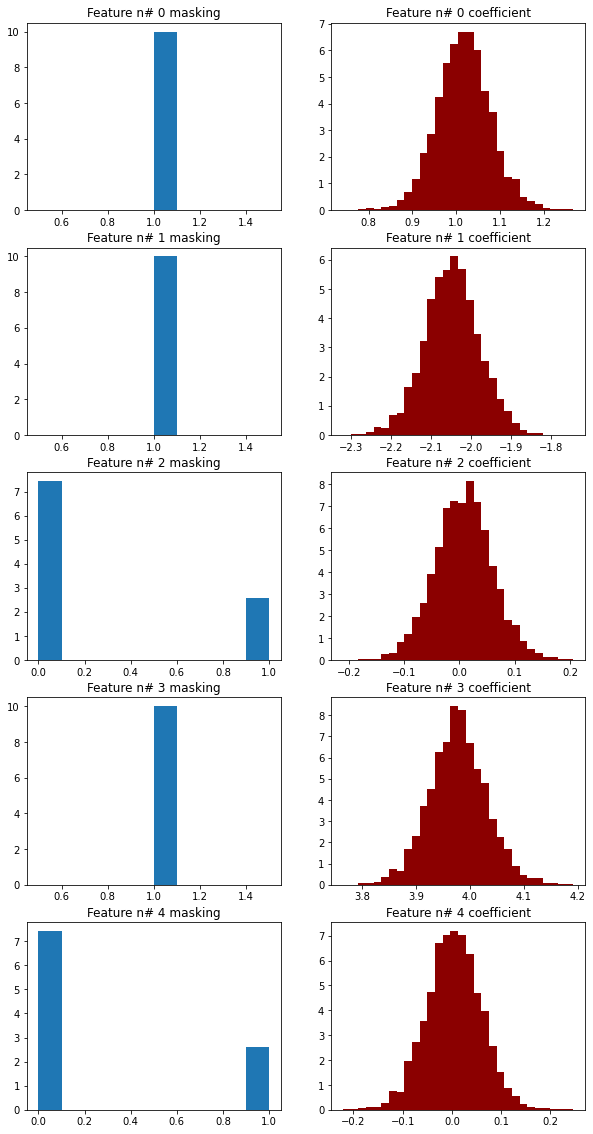

In [20]:
#lets see the distribution for the z and the betas marginalized over everything else

import matplotlib.pyplot as plt

fig, axs = plt.subplots(n_features,2,figsize=[10,20])

for j in range(n_features):
    axs[j,0].set_title("Feature n# {} masking".format(j))
    axs[j,0].hist(samples['z'][:,j],density = True)
    axs[j,1].set_title("Feature n# {} coefficient".format(j))
    axs[j,1].hist(samples['beta'][:,j],density=True,bins=30,color='darkred')

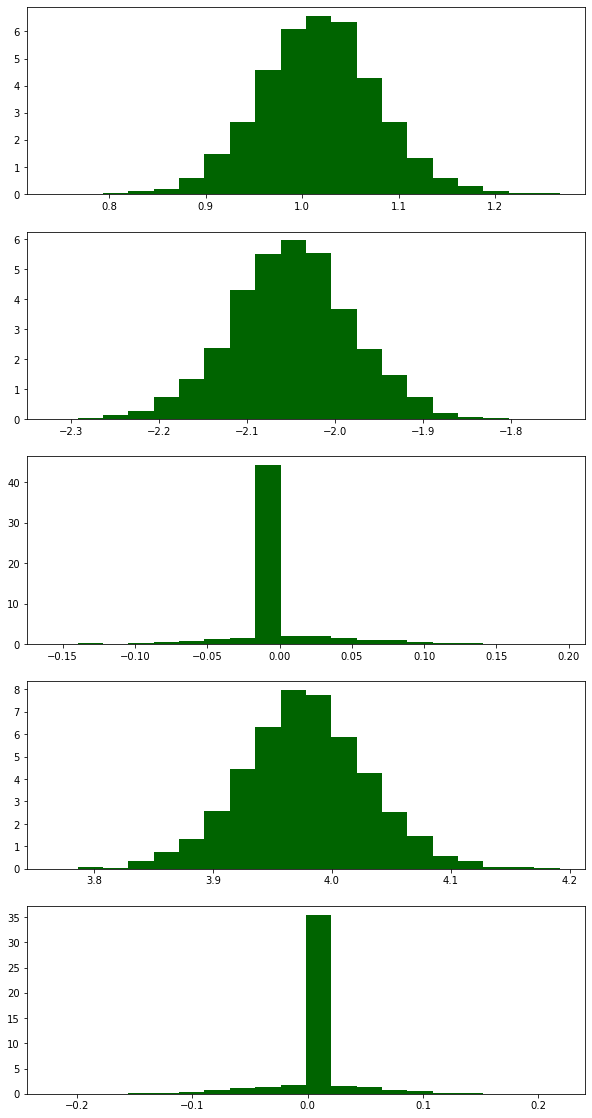

In [25]:
# now let's observe the distribution of z * betas

fig, axs = plt.subplots(n_features,figsize=[10,20])

for i in range(n_features):
    axs[i].hist(samples["beta"][:,i]*samples["z"][:,i],bins=20,density=True,color='darkgreen')


In [31]:
np.mean(samples['beta'],axis=0)

array([ 1.01706342, -2.04842899,  0.00745336,  3.97753624,  0.00417291])